In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import  StandardScaler, MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

In [27]:

# Load the data
dataset = pd.read_csv("kc_house_data.csv")

dataset.drop(columns = ['id', 'zipcode', 'lat', 'long', 'date'], inplace = True)

dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

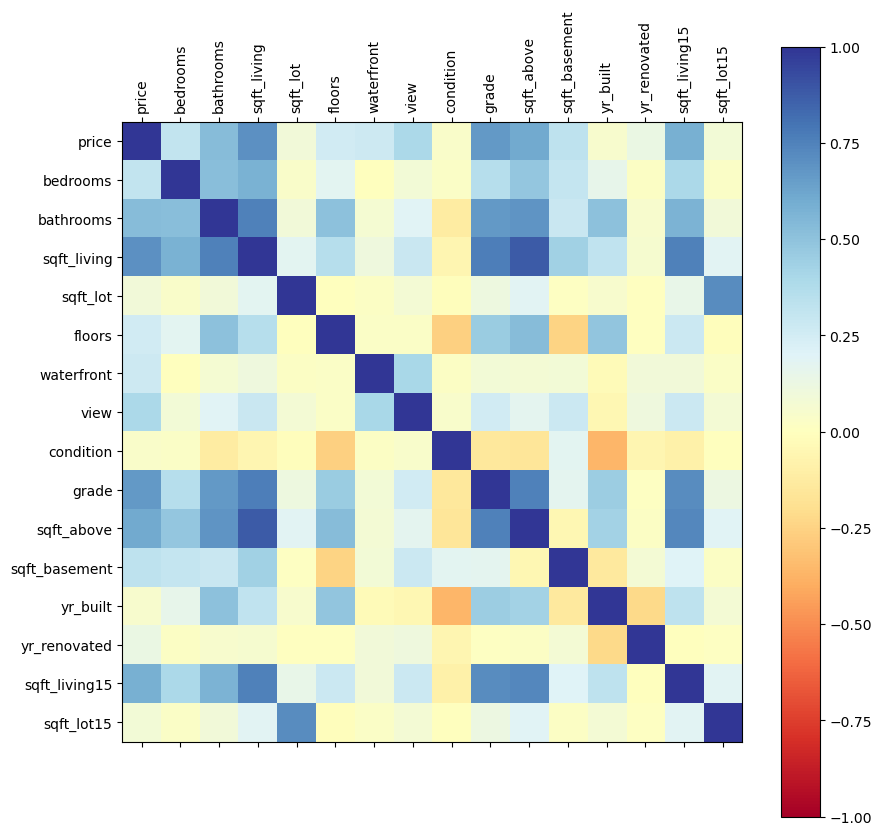

In [28]:
correlationMatrix(dataset)

In [18]:
X1 = dataset[['sqft_living']]
y = dataset['price']

X2 = dataset[['grade']]

X3 = dataset[['sqft_living', 'grade']]

In [23]:
model1 = LinearRegression()
model1.fit(X1, y)
y_pred1 = model1.predict(X1)
r2_1 = r2_score(y, y_pred1)

model2 = LinearRegression()
model2.fit(X2, y)
y_pred2 = model2.predict(X2)
r2_2 = r2_score(y, y_pred2)

model3 = LinearRegression()
model3.fit(X3, y)
y_pred3 = model3.predict(X3)
r2_3 = r2_score(y, y_pred3)

In [25]:
print("R^2 Score for M1: ", r2_1)
print("R^2 Score for M2: ", r2_2)
print("R^2 Score for M3: ", r2_3)

R^2 Score for M1:  0.4928532179037931
R^2 Score for M2:  0.44546848610928724
R^2 Score for M3:  0.5345023805351069


In [1]:
print("Model Coefficients for M1: ", model1.coef_)
print("Model Coefficients for M2: ", model2.coef_)
print("Model Coefficients for M3: ", model3.coef_)

NameError: name 'model1' is not defined

In [4]:
def rmse(y_pred, y_true):
    return(np.sqrt( mean_squared_error(y_pred, y_true)))

In [6]:
df = pd.read_csv('kc_house_data.csv')

predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_living15','sqft_lot15',]

# store the score for each  random_state
scores = []
# random state values
for seed in range(0,40, 1):
    # split the dataset train (90%), test (10%)
    X_train, X_test, y_train, y_test = train_test_split(
        df[predictors],
        df.price,
        test_size=0.10,
        random_state=seed)
    # fit a linear regression model
    model = LinearRegression().fit(X_train,y_train)
    # predicted values for the test set
    yhat = model.predict(X_test)
    # record the scores
    scores.append({
        'seed': seed,
        'rmse': np.sqrt(mean_squared_error(yhat, y_test)),
    })

# transform the list of dictionnaries into a dataframe for ease of use and sort the dataframe
scores = pd.DataFrame(scores).sort_values(by = 'rmse').reset_index()

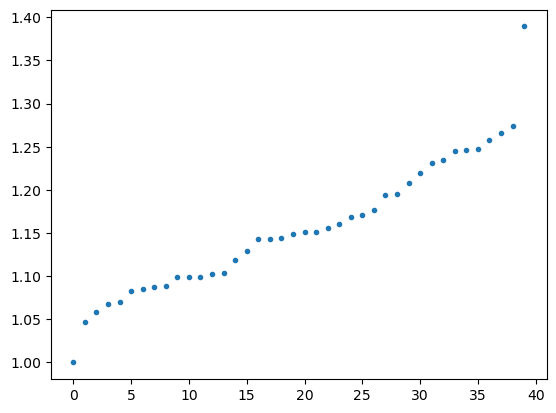

In [8]:
plt.plot(scores.rmse/np.min(scores.rmse), '.')

In [10]:
df[df.sqft_basement == 0].shape[0]

13126

In [12]:
df[df.yr_renovated == 0].shape[0] / df.shape[0]

0.9577106371165502

In [14]:
df['basement'] = 0 # by default no basement 
df.loc[ df.sqft_basement > 0 , 'basement'] = 1 # except when the surface is not zero

df['renovated'] = 0 # by default no renovation 
df.loc[ df.yr_renovated > 0 , 'renovated'] = 1 # except when the year of renovation is not zero

In [24]:
predictors = ['bedrooms', 'bathrooms', 'floors']

y = df['price']

X1 = df[predictors]


X2 = df[predictors + ['sqft_basement', 'yr_renovated']]

X3 = df[predictors + ['sqft_basement', 'yr_renovated', 'basement', 'renovated']]

In [29]:
model1 = LinearRegression()
model1.fit(X1, y)
y_pred1 = model1.predict(X1)
r2_1 = r2_score(y, y_pred1)

model2 = LinearRegression()
model2.fit(X2, y)
y_pred2 = model2.predict(X2)
r2_2 = r2_score(y, y_pred2)

model3 = LinearRegression()
model3.fit(X3, y)
y_pred3 = model3.predict(X3)
r2_3 = r2_score(y, y_pred3)

print("R^2 Score for M1: ", r2_1)
print("R^2 Score for M2: ", r2_2)
print("R^2 Score for M3: ", r2_3)

R^2 Score for M1:  0.27768430683337564
R^2 Score for M2:  0.32483668636412144
R^2 Score for M3:  0.3326063475450113


In [47]:
predictors = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15',]

y = df['price']
X = df[predictors]

# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

In [48]:
test_size = 0.33
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
model = KNeighborsRegressor()

In [49]:
model.fit(X_train, Y_train)
predictions = model.predict(X_train)
r2_4 = r2_score(Y_train, predictions)
print("R^2 Score: ", r2_4)

R^2 Score:  0.7001905927985762


In [50]:
predictions = model.predict(X_train)
mse = mean_squared_error(Y_train, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 202274.21809047737


In [44]:
predictors = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15',]

y = df['price']
X = df[predictors]

test_size = 0.33
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
model = KNeighborsRegressor()

model.fit(X_train, Y_train)
predictions = model.predict(X_train)
r2_5 = r2_score(Y_train, predictions)
print("R^2 Score: ", r2_5)

R^2 Score:  0.6732555723412266


In [46]:
predictions = model.predict(X_train)
mse = mean_squared_error(Y_train, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 211165.02982749252


In [108]:
ordinal_predictors = ['bedrooms', 'bathrooms', 'floors','waterfront', 'view', 'condition', 'grade']
sqft_variables = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15']


In [109]:
log_variables = []
for p in sqft_variables:
    var_name = 'log_' + p
    log_variables.append(var_name)
    df[var_name] = np.log(df[p] +1)

# Don't forget to create the log of the target variable
df['log_price'] = np.log(df['price'] +1)

log_sqft_variables = ['log_sqft_living', 'log_sqft_lot','log_sqft_above', 'log_sqft_living15','log_sqft_lot15']

In [57]:
predictors = [ordinal_predictors + sqft_variables]

y1 = df['price']
X1 = df[ordinal_predictors + sqft_variables]

y2 = df['price']
X2 = df[ordinal_predictors + sqft_variables]

y3 = df['log_price']
X3 = df[ordinal_predictors + log_sqft_variables]

y4 = df['log_price']
X4 = df[ordinal_predictors + log_sqft_variables]

In [60]:
model1 = LinearRegression()
model1.fit(X1, y1)
y_pred1 = model1.predict(X1)
r2_1 = r2_score(y1, y_pred1)

model2 = KNeighborsRegressor()
model2.fit(X2, y2)
y_pred2 = model2.predict(X2)
r2_2 = r2_score(y2, y_pred2)

model3 = LinearRegression()
model3.fit(X3, y3)
y_pred3 = model3.predict(X3)
r2_3 = r2_score(y3, y_pred3)

model4 = KNeighborsRegressor()
model4.fit(X4, y4)
y_pred4 = model4.predict(X4)
r2_4 = r2_score(y4, y_pred4)

print("R^2 Score for M1: ", r2_1)
print("R^2 Score for M2: ", r2_2)
print("R^2 Score for M3: ", r2_3)
print("R^2 Score for M4: ", r2_4)

R^2 Score for M1:  0.6070546239949495
R^2 Score for M2:  0.6735723198633998
R^2 Score for M3:  0.6041608132181918
R^2 Score for M4:  0.7521416419662736


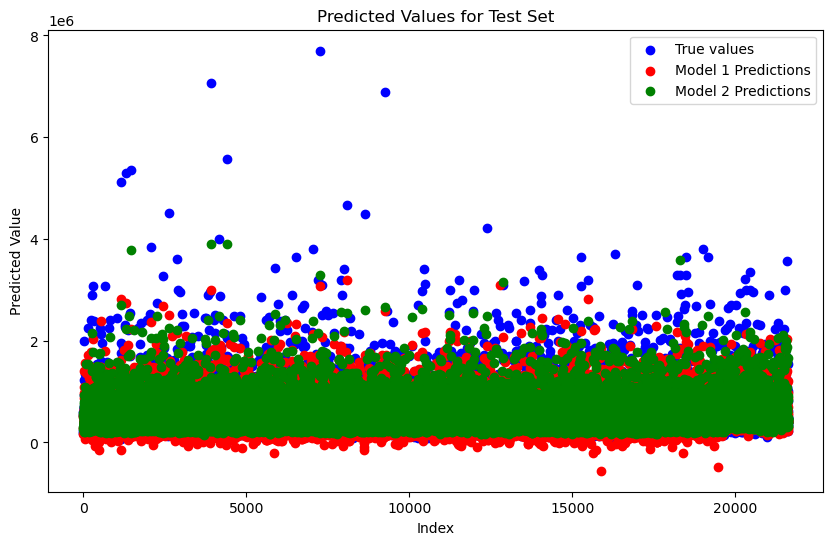

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y1)), y1, color='blue', label='True values')
plt.scatter(range(len(y1)), y_pred1, color='red', label='Model 1 Predictions')
plt.scatter(range(len(y1)), y_pred2, color='green', label='Model 2 Predictions')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values for Test Set')
plt.legend()
plt.show()

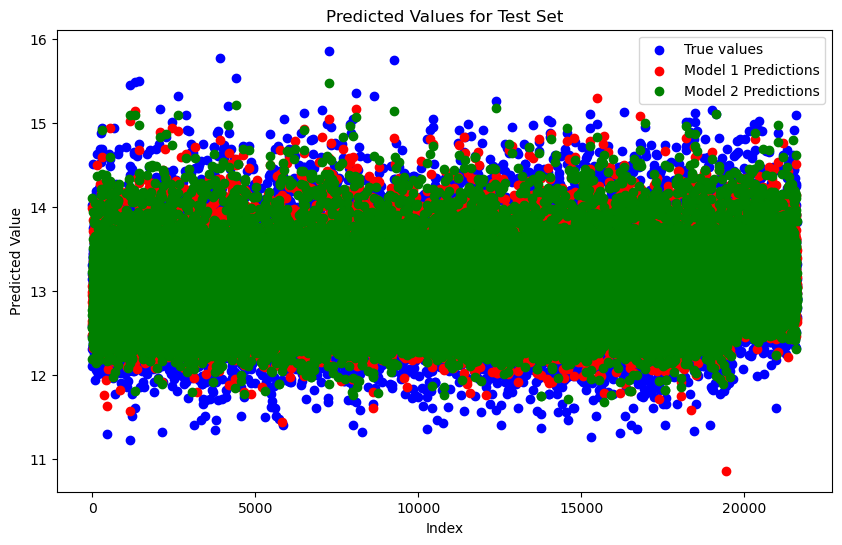

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y3)), y3, color='blue', label='True values')
plt.scatter(range(len(y3)), y_pred3, color='red', label='Model 1 Predictions')
plt.scatter(range(len(y3)), y_pred4, color='green', label='Model 2 Predictions')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values for Test Set')
plt.legend()
plt.show()

In [88]:
predictors = predictors = ['bedrooms', 'bathrooms', 'floors','waterfront', 'view', 'condition', 'grade'] + ['log_sqft_living', 'log_sqft_lot','log_sqft_above', 'log_sqft_living15','log_sqft_lot15']

y = df['log_price']
X = df[predictors]

test_size = 0.33
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
model = KNeighborsRegressor()

In [114]:
#

k = 1: RMSE = 0.044452132653761925, MAE = 0.003442772079113837, R^2 = 0.9928762914918096
k = 2: RMSE = 0.2039324127346512, MAE = 0.15430284542126554, R^2 = 0.8500683046095134
k = 3: RMSE = 0.23667695710954953, MAE = 0.18186152427337904, R^2 = 0.7980550993755566
k = 4: RMSE = 0.25211695679309226, MAE = 0.19452480269802563, R^2 = 0.7708472625754479
k = 5: RMSE = 0.26220520927226665, MAE = 0.20283831288207474, R^2 = 0.7521416419662736
k = 6: RMSE = 0.2695380150524505, MAE = 0.20901400148055868, R^2 = 0.7380846277526656
k = 7: RMSE = 0.2746544504064542, MAE = 0.21328002162838258, R^2 = 0.7280467719456749
k = 8: RMSE = 0.2779522508976258, MAE = 0.21638907741622415, R^2 = 0.7214768310499221
k = 9: RMSE = 0.2810441306281282, MAE = 0.2190495814929349, R^2 = 0.7152459060202223
k = 10: RMSE = 0.28328743330466016, MAE = 0.2210604043956535, R^2 = 0.7106819321083769
k = 11: RMSE = 0.2853089432092917, MAE = 0.22282092539560916, R^2 = 0.706538111954077
k = 12: RMSE = 0.287257999303225, MAE = 0.224440

ValueError: Found input variables with inconsistent numbers of samples: [14480, 19451]

In [115]:
predictors= ['bedrooms', 'bathrooms', 'floors','waterfront', 'view', 'condition', 'grade'] + ['log_sqft_living', 'log_sqft_lot','log_sqft_above', 'log_sqft_living15','log_sqft_lot15']
X_train, X_test, y_train, y_test = train_test_split(df[predictors],df['log_price'],test_size=0.33,random_state=8)

scores = []
for k in range(1,16,1):
    model = KNeighborsRegressor(n_neighbors=k, weights='uniform').fit(X_train,y_train)
    yhat = model.predict(X_test)
    yhat_tr = model.predict(X_train)
    print("[{}] R^2 {:.3f} RMSE {:.2f} ".format(k, model.score(X_test,y_test) , np.sqrt(mean_squared_error(yhat, y_test))  ))


    scores.append({
        'k': k,
        'r2': model.score(X_test,y_test) ,
        'rmse': np.sqrt(mean_squared_error(yhat, y_test))
    })

scores = pd.DataFrame(scores)
scores = scores.sort_values(by = 'rmse' ).reset_index()

[1] R^2 0.382 RMSE 0.41 
[2] R^2 0.532 RMSE 0.36 
[3] R^2 0.578 RMSE 0.34 
[4] R^2 0.598 RMSE 0.33 
[5] R^2 0.612 RMSE 0.32 
[6] R^2 0.622 RMSE 0.32 
[7] R^2 0.627 RMSE 0.32 
[8] R^2 0.630 RMSE 0.32 
[9] R^2 0.635 RMSE 0.31 
[10] R^2 0.638 RMSE 0.31 
[11] R^2 0.639 RMSE 0.31 
[12] R^2 0.640 RMSE 0.31 
[13] R^2 0.641 RMSE 0.31 
[14] R^2 0.641 RMSE 0.31 
[15] R^2 0.641 RMSE 0.31 
